Introduction: In order to determine which neighborhood has the best overall quality of life, my sub metric is **education**.  We're specifically going to use a dataset that shows rates of school enrollment by neighborhood and age. This will help us determine which neighborhood has the best commitment, access to, investment in, and prioritization of education. 

First, I decided to exclude the data on enrollment below grade 10. I chose to do this because in PA, it's compulsory and legally enforced to attend school until the age of 16 (with some exceptions). By focusing on enrollment data from grade 10 through graduate/professional schooling, we can better evaluate enrollment rates driven by individual choice rather than legal requirements.

In [43]:
import pandas as pd

data = pd.read_csv('lol/schooldatataatat.csv')

neighborhoods_of_interest = [
    'Shadyside', 'Bloomfield', 'Oakwood', 'Highland Park', 
    'Westwood', 'East Allegheny', 'Crafton Heights', 
    'Greenfield', 'Brookline', 'Regent Square', 'East Liberty'
]

data_filtered = data[data['Neighborhood'].isin(neighborhoods_of_interest)]

columns_of_interest = [
    'Neighborhood',
    'Estimate; Enrolled in school: - Enrolled in grade 10',
    'Estimate; Enrolled in school: - Enrolled in grade 11',
    'Estimate; Enrolled in school: - Enrolled in grade 12',
    'Estimate; Enrolled in school: - Enrolled in college, undergraduate years',
    'Estimate; Enrolled in school: - Graduate or professional school'
]

data_realed = data_filtered[columns_of_interest].copy()

data_realed['High_School_Enrollment'] = (
    data_realed['Estimate; Enrolled in school: - Enrolled in grade 10'] +
    data_realed['Estimate; Enrolled in school: - Enrolled in grade 11'] +
    data_realed['Estimate; Enrolled in school: - Enrolled in grade 12']
)

data_realed['Undergrad_Enrollment'] = data_realed['Estimate; Enrolled in school: - Enrolled in college, undergraduate years']
data_realed['Professional_School_Enrollment'] = data_realed['Estimate; Enrolled in school: - Graduate or professional school']

# Getting rid of all the default columns
data_realed = data_realed.drop(columns=[
    'Estimate; Enrolled in school: - Enrolled in grade 10',
    'Estimate; Enrolled in school: - Enrolled in grade 11',
    'Estimate; Enrolled in school: - Enrolled in grade 12',
    'Estimate; Enrolled in school: - Enrolled in college, undergraduate years',
    'Estimate; Enrolled in school: - Graduate or professional school'
])

print(data_realed)


       Neighborhood  High_School_Enrollment  Undergrad_Enrollment  \
9        Bloomfield                   149.0                 693.0   
13        Brookline                   406.0                 556.0   
22  Crafton Heights                   111.0                 167.0   
25   East Allegheny                    44.0                  78.0   
28     East Liberty                   279.0                 288.0   
36       Greenfield                   219.0                 392.0   
39    Highland Park                   246.0                 391.0   
59          Oakwood                    17.0                  32.0   
66    Regent Square                    24.0                   6.0   
68        Shadyside                   103.0                1333.0   
89         Westwood                    58.0                 178.0   

    Professional_School_Enrollment  
9                            983.0  
13                           213.0  
22                            18.0  
25                     

So based off this, we can already get a pretty good understanding of which neighborhood is better educationally in terms of enrollment. But these neighborhoods likely have different population totals, which could be an explaining factor to why one has higher or lower enrollment rates. I think it would be more fair to compare school enrollments in relation to the overall population of each neighborhood- that way we can get a sense of which one has the highest enrollment rate in proportion to its population.  

In [50]:
import pandas as pd

data = pd.read_csv('lol/populationsss.csv')
neighborhoods_of_interest = [
    'Shadyside', 'Bloomfield', 'Oakwood', 'Highland Park', 
    'Westwood', 'East Allegheny', 'Crafton Heights', 
    'Greenfield', 'Brookline', 'Regent Square', 'East Liberty'
]

population_filtered = data[data['Community'].isin(neighborhoods_of_interest)]

population_filtered = population_filtered[['Community', 'pop_total']]

print(population_filtered)

           Community pop_total
21        Bloomfield    11,924
31         Brookline    16,547
48   Crafton Heights     4,294
56    East Allegheny     4,505
60      East Liberty     7,815
84        Greenfield     9,584
93     Highland Park     8,514
139          Oakwood     1,195
158    Regent Square     1,167
169        Shadyside    13,945
210         Westwood     3,647


Now, we'll merge the two datasets so we can calculate enrollment rate as percentage of population for each category (non-compulsory highschool, undergraduate, and graduate/professional)

In [83]:
combined = pd.merge(data_realed, population_filtered, left_on='Neighborhood', right_on='Community')
# Remove commas and convert to numeric
combined['pop_total'] = combined['pop_total'].str.replace(',', '').astype(float)
combined['High_School_Enrollment'] = pd.to_numeric(combined['High_School_Enrollment'], errors='coerce')
combined['Undergrad_Enrollment'] = pd.to_numeric(combined['Undergrad_Enrollment'], errors='coerce')
combined['Professional_School_Enrollment'] = pd.to_numeric(combined['Professional_School_Enrollment'], errors='coerce')
combined['pop_total'] = pd.to_numeric(combined['pop_total'], errors='coerce')

combined['High_School_Enrollment_Rate'] = (combined['High_School_Enrollment'] / combined['pop_total']) * 100
combined['Undergrad_Enrollment_Rate'] = (combined['Undergrad_Enrollment'] / combined['pop_total']) * 100
combined['Graduate_Enrollment_Rate'] = (combined['Professional_School_Enrollment'] / combined['pop_total']) * 100

print(combined)


       Neighborhood  High_School_Enrollment  Undergrad_Enrollment  \
0        Bloomfield                   149.0                 693.0   
1         Brookline                   406.0                 556.0   
2   Crafton Heights                   111.0                 167.0   
3    East Allegheny                    44.0                  78.0   
4      East Liberty                   279.0                 288.0   
5        Greenfield                   219.0                 392.0   
6     Highland Park                   246.0                 391.0   
7           Oakwood                    17.0                  32.0   
8     Regent Square                    24.0                   6.0   
9         Shadyside                   103.0                1333.0   
10         Westwood                    58.0                 178.0   

    Professional_School_Enrollment        Community  pop_total  \
0                            983.0       Bloomfield    11924.0   
1                            213.0     

Now time to visualize the data 

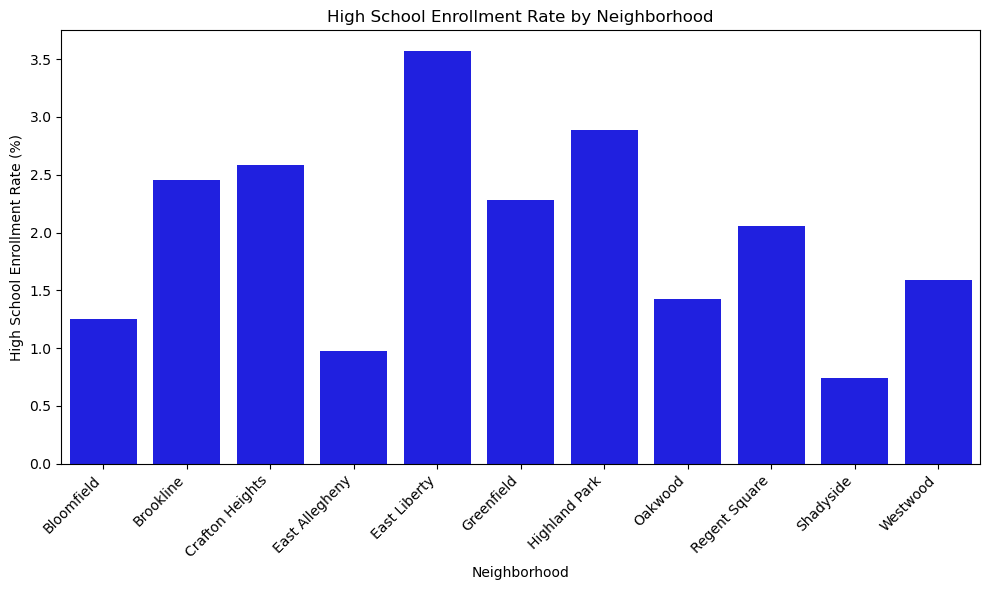

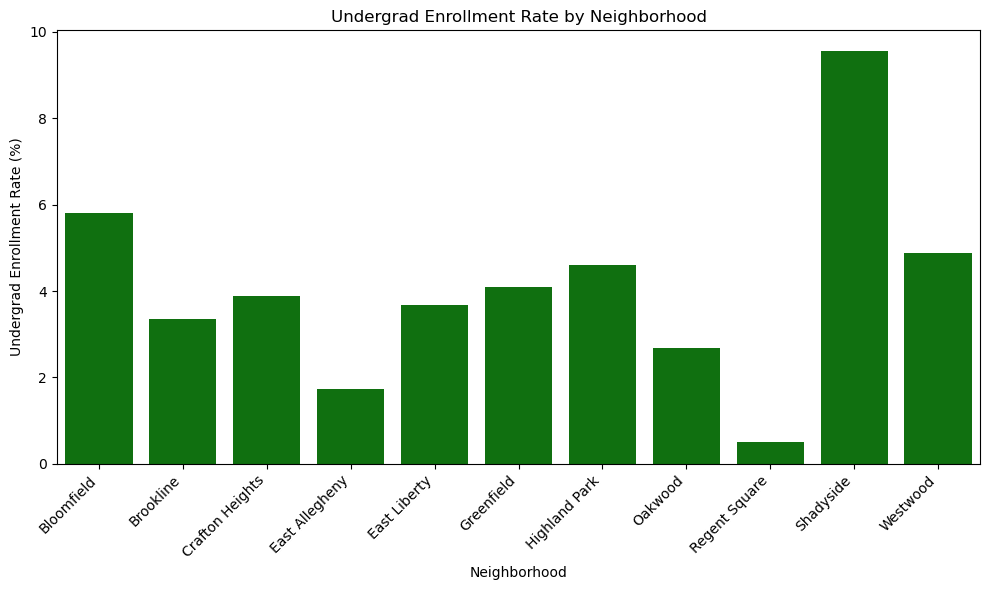

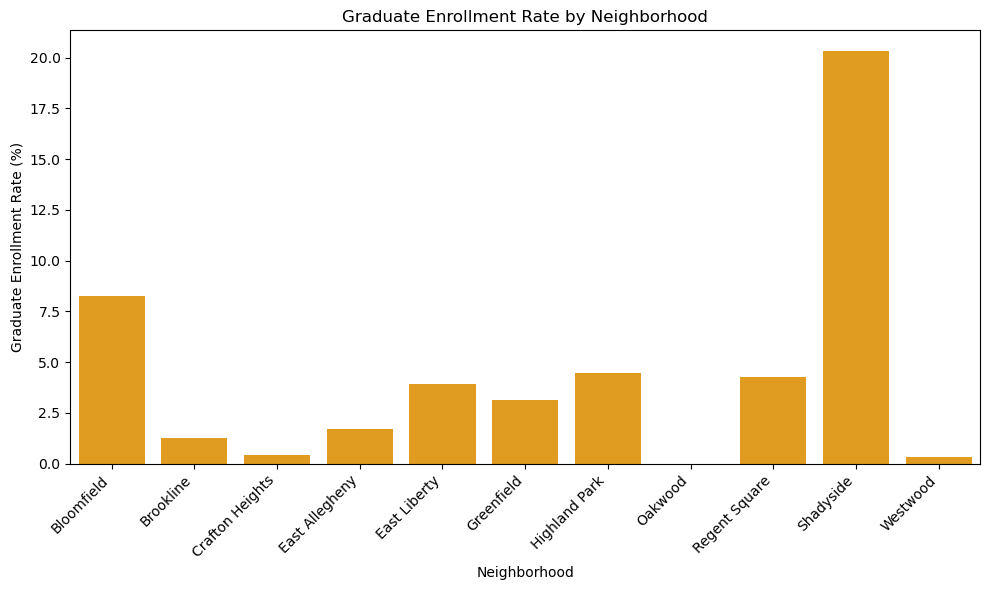

In [87]:
import matplotlib.pyplot as plt
#highschool
plt.figure(figsize=(10, 6))
sns.barplot(data=combined, x='Neighborhood', y='High_School_Enrollment_Rate', color='blue')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Neighborhood')
plt.ylabel('High School Enrollment Rate (%)')
plt.title('High School Enrollment Rate by Neighborhood')
plt.tight_layout()
plt.show()

# Undergrad
plt.figure(figsize=(10, 6))
sns.barplot(data=combined, x='Neighborhood', y='Undergrad_Enrollment_Rate', color='green')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Neighborhood')
plt.ylabel('Undergrad Enrollment Rate (%)')
plt.title('Undergrad Enrollment Rate by Neighborhood')
plt.tight_layout()
plt.show()

#Graduate
plt.figure(figsize=(10, 6))
sns.barplot(data=combined, x='Neighborhood', y='Graduate_Enrollment_Rate', color='orange')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Neighborhood')
plt.ylabel('Graduate Enrollment Rate (%)')
plt.title('Graduate Enrollment Rate by Neighborhood')
plt.tight_layout()
plt.show()


So by looking at just graduate and undergrad enrollment rates, Shadyside seems to be the winner- to be sure, we're gonna average the three rates so we get an understanding of each neighborhood's full overall performance. 

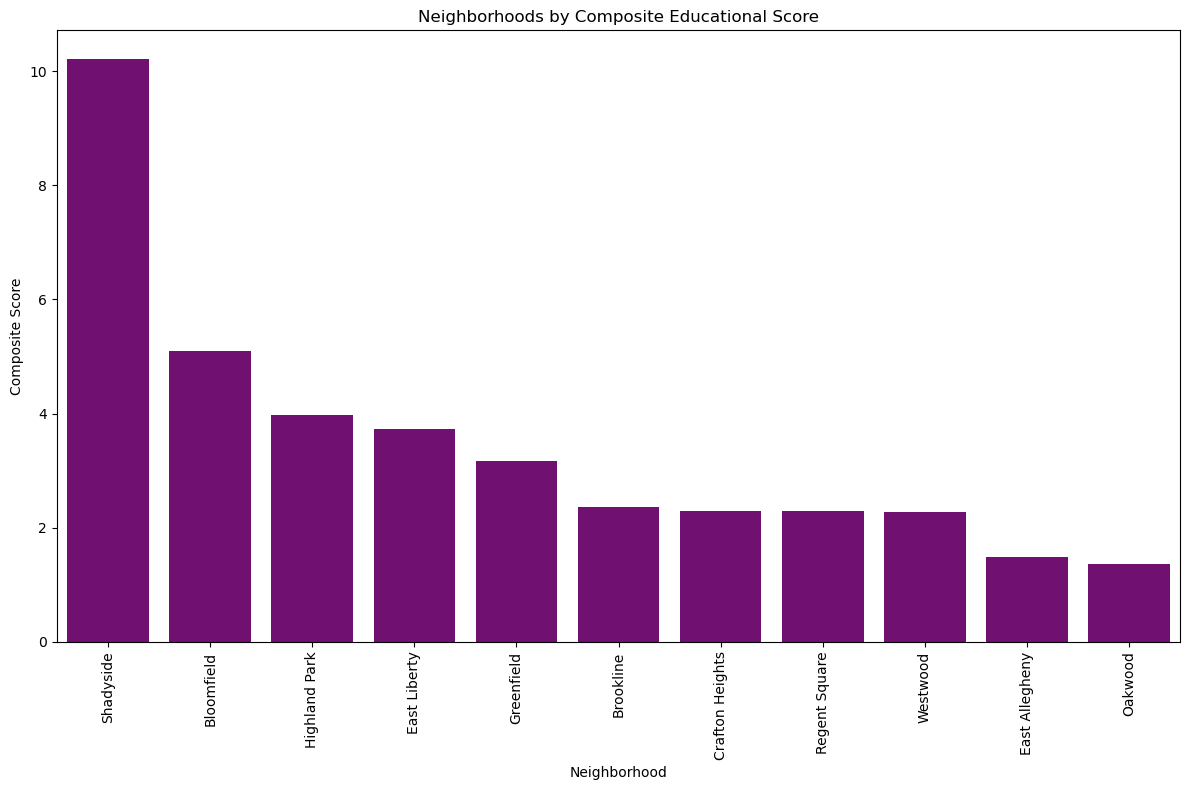

In [94]:
combined['totalscore'] = (combined['High_School_Enrollment_Rate'] + 
                           combined['Undergrad_Enrollment_Rate'] + 
                           combined['Graduate_Enrollment_Rate']) / 3

bestneighborhood = combined.sort_values(by='totalscore', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=bestneighborhood, x='Neighborhood', y='totalscore', color='purple')  
plt.xticks(rotation=90, ha="center")  
plt.xlabel('Neighborhood')
plt.ylabel('overall Score')
plt.title('Neighborhoods by Overall Educational Score')
plt.tight_layout()
plt.show()

Okay, looks like Shadyside is still our winner- and by a lot! 

Conclusion: Shadyside won best neighborhood according to the analysis- especially in the undergraduate and graduate enrollment rates, which I think definitely reflects it being higher quality in terms of education because it might offer greater opportunities/connections to higher education or simply have a culture that encourages education. Personally, my favorite neighborhood is Monroeville since it’s where I grew up. Unfortunately, it wasn’t included in the analysis, but it would have been interesting to see how it ranked.  Monroeville has a more suburban vibe and isn't really an affluent area in comparison to Shadyside, so I’m pretty confident it wouldn’t have placed as highly as Shadyside.